#Student Name: Abhijit Sinha
#Student ID: 18195067

### Problem Description

A student is writing an exam where each question has 4 multiple choice options. The student is not well prepared but can re-try the test as many times and hence plans to go for a guess work with an aspiration to score 100 out of 100 score. 
What are the chances of the score being a perfect 100 if the student tries 100, 1000 and 10000 attempts?

### Refection:
- Added a random element by including multiple choice options in the problem. Thanks for Martin Power for sharing the idea.
- Created functions to reuse code for performing multiple tests attempts.
- Updated the graphs to plot mean, standard deviation with the histogram of probability distribution.
- Followed examples from the link for the plots: https://matplotlib.org/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py

- Used %time in cells to profile the time taken to run the test simulations

In [1]:
%reset -f
%matplotlib inline

import numpy as np
import random as random
import matplotlib.pyplot as plt

In [2]:
def random_test(num_trials):
    """Function to randomly shuffle the test answers and returns the samples with correct answer"""
    
    samples = []
    for i in range(num_trials):
        correct_answers = 0
        
        for j in range(num_questions):
            correct_answer = random.choice(sample_space)
            student_guess = random.choice(sample_space)
            
            if student_guess == correct_answer:
                correct_answers += 1
            samples.append(correct_answers)
            
    return samples


def plot_histogram(samples, num_bins, mean, std_dev):
    """Plot a Probability density function for the list of samples"""

    plt.title("Probability Distribution of score")
    plt.xlabel("Marks obtained by the student")
    plt.ylabel("Probability")
    
    
    # PLot the histogram
    plt.hist(samples, num_bins, facecolor='blue', density=True)
    # Plot the mean/expected value
    plt.axvline(x=mean, color='red', linestyle='dashed', linewidth=2, alpha=0.75, label='Expected Value')
    # Plot the standard deviation
    plt.axvspan(mean-std_dev, mean+std_dev, facecolor='green', alpha=0.35, label='Standard deviation')
    plt.legend()
    plt.show()
    
    
def simulate_test(attempts):
    """Function to simulate the attempts a student takes for the test"""
    test_result = random_test(attempts)

    # Mean: Expected value is the mean
    mean = np.mean(test_result)
    print("Mean of Samples: ", mean)

    # Standard deviation
    std_deviation = np.std(test_result)
    print("Standard Deviation: ", std_deviation)
    
    # Plot histogram
    plot_histogram(test_result, num_questions, mean, std_deviation)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.1 µs
Mean of Samples:  12.7257
Standard Deviation:  7.875637085975966


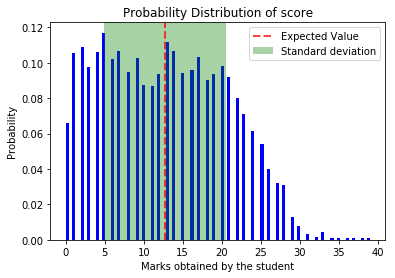

In [3]:
%time
# Test parameters
sample_space = ["a", "b", "c", "d"]
num_questions = 100


# Run the experiment for 100 attempts
simulate_test(100)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs
Mean of Samples:  12.61427
Standard Deviation:  7.792696732652952


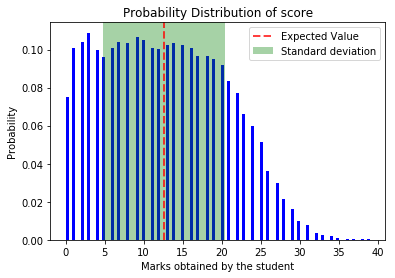

In [4]:
%time
# Run the experiment for 1000 attempts
simulate_test(1000)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs
Mean of Samples:  12.636077
Standard Deviation:  7.842129114600894


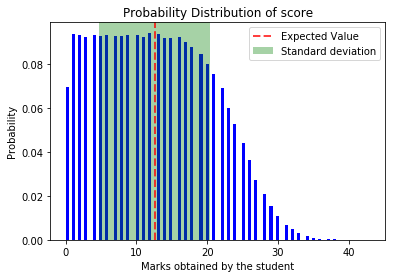

In [5]:
%time
# Run the experiment for 10000 attempts
simulate_test(10000)

In [6]:
print("NOTE: Always be well preapred for the examination...!!!")

NOTE: Always be well preapred for the examination...!!!
